In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from tidegauge_functions import read_tidegauge_psmsl

# %matplotlib notebook
%matplotlib inline
# %matplotlib widget

## Read in VLIZ realtime data

currently need to download HTML table, rename with '.xls' extension, open in Microsoft Excel (or similar), and save as a CSV

In [2]:
dir_in = 'data/tidegauge'
# file_in = 'h820'
file_in = 'vliz_realtime_h820'
ext = '.csv'

filepath = os.path.join(dir_in, file_in + ext)

df = pd.read_csv(filepath)
df

,Time (UTC),prs(m)
0,9/15/20 21:32,0.573
1,9/15/20 21:37,0.553
2,9/15/20 21:42,0.526
3,9/15/20 21:47,0.495
4,9/15/20 21:52,0.475
...,...,...
8629,10/15/20 21:03,0.567
8630,10/15/20 21:08,0.586
8631,10/15/20 21:13,0.585
8632,10/15/20 21:18,0.576


In [3]:
dt = pd.to_datetime(df['Time (UTC)'])

# create datetime index
df.index = pd.DatetimeIndex(dt)
df

,Time (UTC),prs(m)
Time (UTC),,
2020-09-15 21:32:00,9/15/20 21:32,0.573
2020-09-15 21:37:00,9/15/20 21:37,0.553
2020-09-15 21:42:00,9/15/20 21:42,0.526
2020-09-15 21:47:00,9/15/20 21:47,0.495
2020-09-15 21:52:00,9/15/20 21:52,0.475
...,...,...
2020-10-15 21:03:00,10/15/20 21:03,0.567
2020-10-15 21:08:00,10/15/20 21:08,0.586
2020-10-15 21:13:00,10/15/20 21:13,0.585


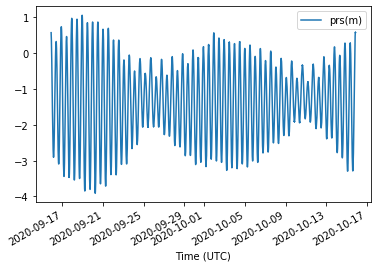

In [4]:
df[['prs(m)']].plot()

In [29]:
df[['prs_shifted']] = df[['prs(m)']] - df[['prs(m)']].mean()


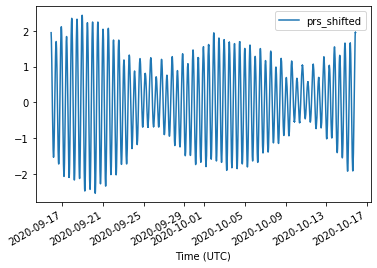

In [30]:
df[['prs_shifted']].plot()

## Read in Greenland Rising tide gauge

ONSET

In [5]:
file_in = 'EtEllerAndet'

filepath = os.path.join(dir_in, file_in + ext)

rt = pd.read_csv(filepath, skiprows=5, header=None, engine='c')

# # columns = ['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']
# df = pd.read_csv(path, skiprows=3, header=None, engine='c')
# if len(df.columns) == len(columns):
#     df.columns = ['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN']

rt

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2020-10-13 13:27:45,13.790,13.790,13.790,13.790,0.000,114.667,114.687,114.605,114.648,...,1.77,1.77,0.00,1.0073,100.878,,,,,NaN
1,2020-10-13 13:28:45,13.790,13.790,13.790,13.790,0.000,114.768,114.768,114.698,114.722,...,1.77,1.77,0.00,1.0183,100.978,,,,,NaN
2,2020-10-13 13:29:45,13.790,13.790,13.790,13.790,0.000,114.911,114.911,114.822,114.853,...,1.77,1.77,0.00,1.0335,101.122,,,,,NaN
3,2020-10-13 13:30:45,13.790,13.790,13.790,13.790,0.000,115.019,115.019,114.915,114.961,...,1.77,1.77,0.00,1.0451,101.230,,,,,NaN
4,2020-10-13 13:31:45,13.790,13.790,13.790,13.790,0.000,115.085,115.085,115.016,115.039,...,1.77,1.77,0.00,1.0500,101.296,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2020-10-14 11:03:45,0.000,0.000,0.000,0.000,0.000,107.537,107.659,107.537,107.590,...,2.10,2.10,0.00,0.1037,107.537,,,,,NaN
1299,2020-10-14 11:04:34,,,,,,,,,,...,,,,,,,,Logged,,NaN
1300,2020-10-14 11:04:45,0.000,0.000,0.000,0.000,0.000,107.337,107.491,107.337,107.418,...,2.10,2.10,0.00,0.0831,107.337,,,,,NaN
1301,2020-10-14 11:04:48,,,,,,,,,,...,,,,,,,,Logged,,NaN


In [6]:
rt.keys()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [7]:
columns = ["Date Time - GMT -03:00","Diff Press, (kPa)","Diff Press - Max, (kPa)",
           "Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)",
           "Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)",
           "Abs Press - StdDev, (kPa)","Temp, (*C)","Temp - Max, (*C)","Temp - Min, (*C)","Temp - Avg, (*C)",
           "Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)",
           "Water Density, (kg/m3)","Host Connect","EOF","unknown"]
if len(rt.columns) == len(columns):
    rt.columns = columns

dt = pd.to_datetime(rt['Date Time - GMT -03:00'])

# create datetime index
rt.index = pd.DatetimeIndex(dt)

rt = rt.drop('Date Time - GMT -03:00', axis=1)

# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
rt = rt.apply(pd.to_numeric, errors='coerce')

rt

,"Diff Press, (kPa)","Diff Press - Max, (kPa)","Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)","Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)","Abs Press - StdDev, (kPa)",...,"Temp - Min, (*C)","Temp - Avg, (*C)","Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)","Water Density, (kg/m3)",Host Connect,EOF,unknown
Date Time - GMT -03:00,,,,,,,,,,,,,,,,,,,,,
2020-10-13 13:27:45,13.79,13.79,13.79,13.79,0.0,114.667,114.687,114.605,114.648,0.035,...,1.77,1.77,0.0,1.0073,100.878,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:28:45,13.79,13.79,13.79,13.79,0.0,114.768,114.768,114.698,114.722,0.031,...,1.77,1.77,0.0,1.0183,100.978,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:29:45,13.79,13.79,13.79,13.79,0.0,114.911,114.911,114.822,114.853,0.039,...,1.77,1.77,0.0,1.0335,101.122,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:30:45,13.79,13.79,13.79,13.79,0.0,115.019,115.019,114.915,114.961,0.043,...,1.77,1.77,0.0,1.0451,101.230,NaN,NaN,NaN,NaN,NaN
2020-10-13 13:31:45,13.79,13.79,13.79,13.79,0.0,115.085,115.085,115.016,115.039,0.031,...,1.77,1.77,0.0,1.0500,101.296,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14 11:03:45,0.00,0.00,0.00,0.00,0.0,107.537,107.659,107.537,107.590,0.054,...,2.10,2.10,0.0,0.1037,107.537,NaN,NaN,NaN,NaN,NaN
2020-10-14 11:04:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-14 11:04:45,0.00,0.00,0.00,0.00,0.0,107.337,107.491,107.337,107.418,0.065,...,2.10,2.10,0.0,0.0831,107.337,NaN,NaN,NaN,NaN,NaN


In [8]:
rt.describe()

,"Diff Press, (kPa)","Diff Press - Max, (kPa)","Diff Press - Min, (kPa)","Diff Press - Avg, (kPa)","Diff Press - StdDev, (kPa)","Abs Press, (kPa)","Abs Press - Max, (kPa)","Abs Press - Min, (kPa)","Abs Press - Avg, (kPa)","Abs Press - StdDev, (kPa)",...,"Temp - Min, (*C)","Temp - Avg, (*C)","Temp - StdDev, (*C)","Water Level, (m)","Baro Press, (kPa)","Reference Water Level, (m)","Water Density, (kg/m3)",Host Connect,EOF,unknown
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.0,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,...,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,0.0,0.0,0.0,0.0,0.0
mean,17.815958,17.863765,17.778776,17.815959,0.0,121.974760,122.020763,121.930098,121.975757,0.039471,...,1.795139,1.803136,0.002881,1.656872,104.158867,NaN,NaN,NaN,NaN,NaN
std,10.333370,10.344761,10.328293,10.333370,0.0,9.885384,9.885675,9.878434,9.882134,0.018453,...,0.294184,0.292201,0.017575,1.007390,2.122346,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.0,104.962000,104.964000,104.952000,104.960000,0.000000,...,1.010000,1.010000,0.000000,-0.058400,99.766000,NaN,NaN,NaN,NaN,NaN
25%,6.895000,6.895000,6.895000,6.895000,0.0,113.306500,113.389250,113.285250,113.345250,0.027000,...,1.670000,1.770000,0.000000,0.759675,102.367000,NaN,NaN,NaN,NaN,NaN
50%,20.684000,20.684000,20.684000,20.684000,0.0,123.213500,123.249000,123.159000,123.196000,0.036000,...,1.770000,1.770000,0.000000,1.785650,104.519000,NaN,NaN,NaN,NaN,NaN
75%,27.579000,27.579000,27.579000,27.579000,0.0,131.403000,131.466750,131.380750,131.418750,0.051000,...,1.990000,1.990000,0.000000,2.604350,105.921000,NaN,NaN,NaN,NaN,NaN
max,34.474000,34.474000,34.474000,34.474000,0.0,135.505000,135.536000,135.458000,135.481000,0.119000,...,2.310000,2.310000,0.110000,3.082400,108.358000,NaN,NaN,NaN,NaN,NaN


(737712.0, 737712.5)

<Figure size 576x360 with 0 Axes>

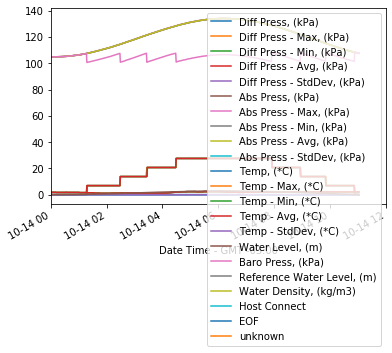

In [9]:
# Set up
fig = plt.figure(figsize=(8,5))
# ax = fig.add_subplot(111)

# Plot
# ln1 = plt.plot(df['SSH'], '-ok', label='daily')
# ln2 = plt.plot(hourly['SSH'], color='orange', label='hourly')


# Customize
# ax.set_title('')
# ax.set_xlim(pd.Timestamp('2020-10-14'), pd.Timestamp('2020-10-16'))


rt.plot()
plt.xlim(pd.Timestamp('2020-10-14T00:00'), pd.Timestamp('2020-10-14T12:00'))

(737712.0, 737712.5)

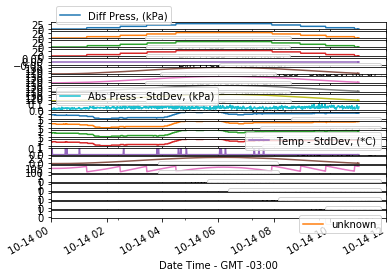

In [10]:
# plt.figure(figsize=(5,15))
rt.plot(subplots=True)#, layout=(12,2))
plt.xlim(pd.Timestamp('2020-10-14T00:00'), pd.Timestamp('2020-10-14T12:00'))


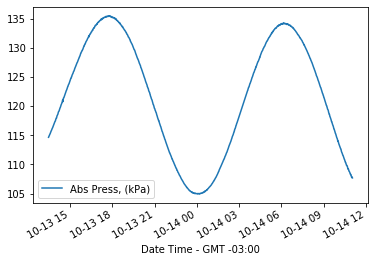

In [11]:
rt[["Abs Press, (kPa)"]].plot()


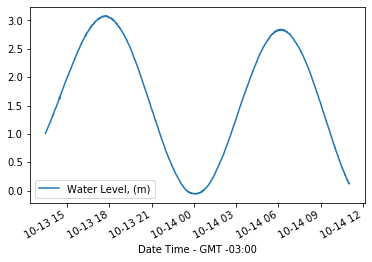

In [12]:
rt[["Water Level, (m)"]].plot()

In [22]:
rt["WaterLevel_shifted"] = rt[["Water Level, (m)"]] - rt[["Water Level, (m)"]].mean()

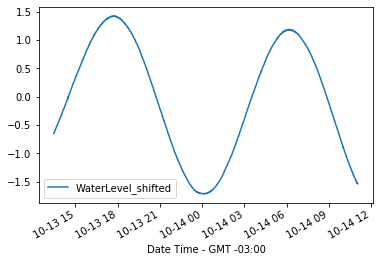

In [23]:
rt[["WaterLevel_shifted"]].plot()

# compare

In [43]:
df_2hr = df.shift(periods=-2, freq="H")
rt_2hr = rt.shift(periods=2, freq="H")

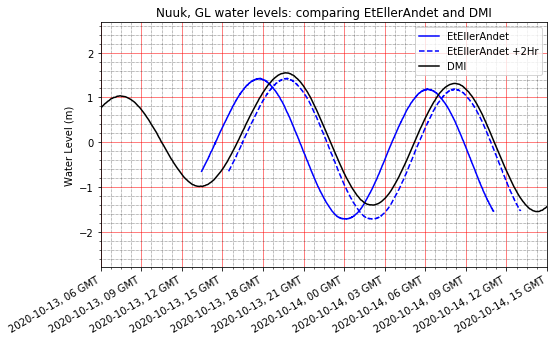

In [73]:
import matplotlib.dates as mdates

# Set up
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# Plot
ln1 = plt.plot(rt['WaterLevel_shifted'], color='blue', label='EtEllerAndet')
ln2 = plt.plot(rt_2hr['WaterLevel_shifted'], '--', color='blue', label='EtEllerAndet +2Hr')
ln3 = plt.plot(df[['prs_shifted']], '-k', label='DMI')

# Customize
ax.set_title('Nuuk, GL water levels: comparing EtEllerAndet and DMI')
ax.set_ylabel('Water Level (m)')

# Grids
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# xaxis
ax.set_xlim(pd.Timestamp('2020-10-13T06:00'), pd.Timestamp('2020-10-14T15:00'))
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H GMT'))
fig.autofmt_xdate()

plt.legend()
plt.savefig('figs/lineplot_Nuuk_compareONSET-vs-DMI_20201014.png')